In [1]:
import pandas as pd

In [2]:
data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast",
                "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"],
    "Temp": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool",
             "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal",
                 "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong",
             "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"],
    "Play": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes",
             "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}

df = pd.DataFrame(data)

In [3]:
X, y = df.drop('Play', axis=1), df['Play']

X[:2], y[:2]

(  Outlook Temp Humidity    Wind
 0   Sunny  Hot     High    Weak
 1   Sunny  Hot     High  Strong,
 0    No
 1    No
 Name: Play, dtype: object)

In [4]:
X_encoded = X.apply(lambda col: pd.factorize(col)[0])
y_encoded, class_labels = pd.factorize(y)

X_encoded[:2], y_encoded[:2]

(   Outlook  Temp  Humidity  Wind
 0        0     0         0     0
 1        0     0         0     1,
 array([0, 0]))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=99
)

In [6]:
from sklearn.tree import DecisionTreeClassifier as DTC

clf = DTC(criterion="entropy",random_state=99)

clf.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,99
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


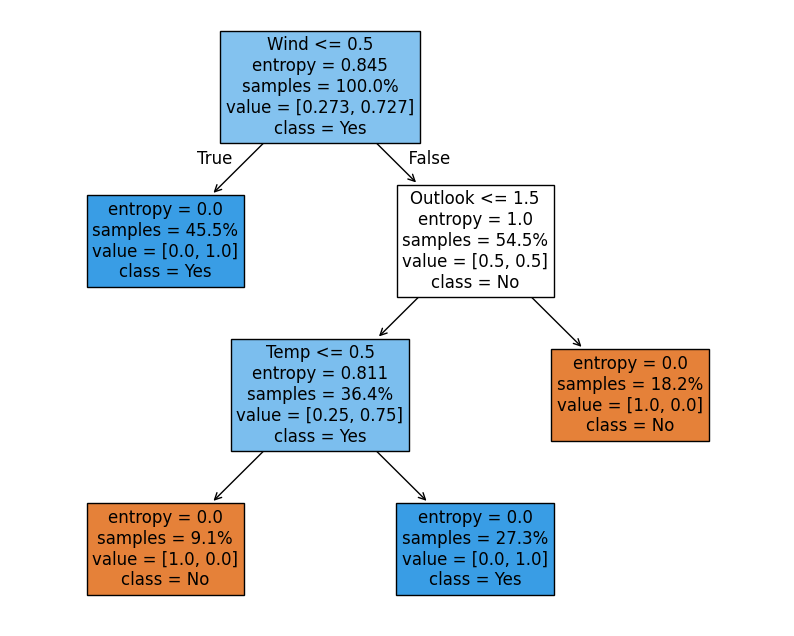

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=class_labels,
    filled=True,
    fontsize=12,
    proportion=True
)
plt.show()

In [8]:
y_pred = clf.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score, precision_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average="macro", zero_division=0))

Accuracy:  0.3333333333333333
Precision:  0.16666666666666666
